<a href="https://colab.research.google.com/github/meenalj/dsnoob/blob/master/Wine_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA on Wine Data

### 1. Summary

### 2. Importing Packages

In [0]:
import numpy as np              
import pandas as pd
import warnings

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True) 

In [0]:
!pip install plotly --upgrade

     |████████████████████████████████| 7.1MB 1.4MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [0]:
!pip install chart-studio

In [0]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

In [0]:
# To install pandas profiling 

!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.4.0)


In [0]:
import pandas_profiling


### 3. Loading data

In [0]:
# Importing the data from the link
path ='https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/winequality.csv'
df_wine = pd.read_csv(path)
df_wine.head()


fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

### Data Dictionary
#### The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. The quality of wine is dependent on various chemicals that contribute to the final flavor, aroma and taste. The dataset lists down some of these chemicals that contribute to the quality of the wine 

|      Column Name     |                            Column Description                            |
|:--------------------:|:------------------------------------------------------------------------:|
| fixed acidity        | Most acids involved with wine or fixed                                   |
| volatile acidity     | The amount of acetic acid in wine                                        |
| citric acid          | Found in small quantities,add 'freshness' and flavor to wines            |
| residual sugar       | The amount of sugar remaining after fermentation stops                   |
| chlorides            | The amount of salt in the wine                                           |
| free sulfur dioxide  | The free form of SO2 prevents microbial growth and the oxidation of wine |
| total sulfur dioxide | Amount of free and bound forms of S02                                    |
| density              | The density of wine depends on the percent alcohol and sugar content     |
| pH                   | Most wines are between 3-4 on the pH scale                               |
| sulphates            | A wine additive which can contribute to sulfur dioxide gas (S02) levels  |
| alcohol              | The percent alcohol content of the wine                                  |
| quality              | Output variable (based on sensory data,score between 0 and 10)           |

We will be using a few functions to help us analyze the dataset better


In [0]:
# Shape of the data
df_wine.shape

In [0]:
##Understanding basic information about the wine data frame
df_wine.info()

#### Below are the insights recieved from the info function
- 6497 **samples(rows)**  and **12 columns** in the wine data frame
- **11 columns** with a **float** data type and **1 column** with **integer** datatype
- **0 missing values** in the data

In [0]:
## Understanding the various stats of the wine data frame
df_wine.describe()

Below are some insights we recieve from the **describe** function
- Mean is close to median for almost all features
- There are outliers present in **residual sugar**, **free sulfur dioxide**, **total sulfur dioxide** columns which is seen by the huge difference between the 75% and max value

In [0]:
# number of unique values in each feature 
for x in df_wine.columns.values:
    print("Number of unique values of {}:{}".format(x,df_wine[x].nunique()))

#### 3.2 Pandas Profiling before Data Preprocessing

In [0]:
##Generating the profiling report of wine data
pandas_profiling.ProfileReport(df_wine,title='Pandas profiling report of wine data',html={'style':{'full_width':True}}).to_notebook_iframe()

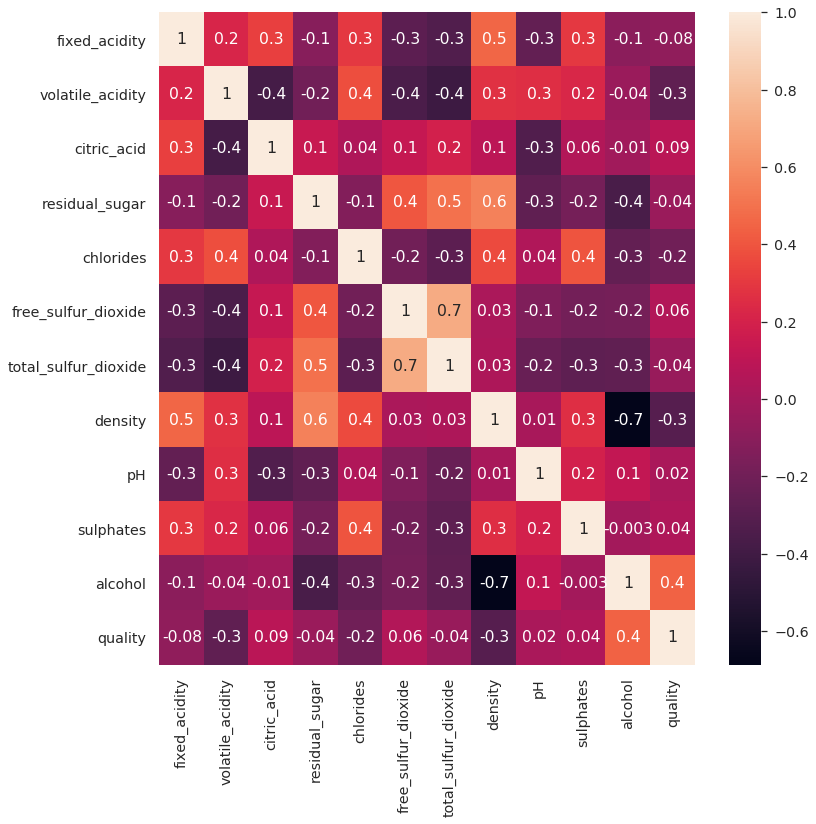

In [0]:
#heat map to find correlation
ax,fig = plt.subplots(figsize=(12,12))
sns.heatmap(df_wine.corr(),annot=True,fmt='.1g')
plt.show()

Observations from the heat map

*   Free sulphur dioxide and total sulphur dioxide have a high degree of positive correlation
*   Density and alcohol have a high degree of negative correlation

A high correlation between features means that there is a high chance that the performance of the model will be affected by mmulticollinearity 



4. Data Preprocessing


4.1 Data cleanup

Rounding off the numbers to 2 decimal places so it is consistent across the dataset



In [0]:
df_wine=df_wine.round(decimals=2)
df_wine.head()

In [0]:
df_wine.quality.value_counts()

In [0]:
# Dropping duplicates from the data set
df_wine_final=df_wine.drop_duplicates()
df_wine_final.shape

(5318, 12)

4.3 Pandas profiling after data cleanup

In [0]:
pandas_profiling.ProfileReport(df_wine_final,title='Pandas profiling report of wine data',html={'style':{'full_width':True}}).to_notebook_iframe()

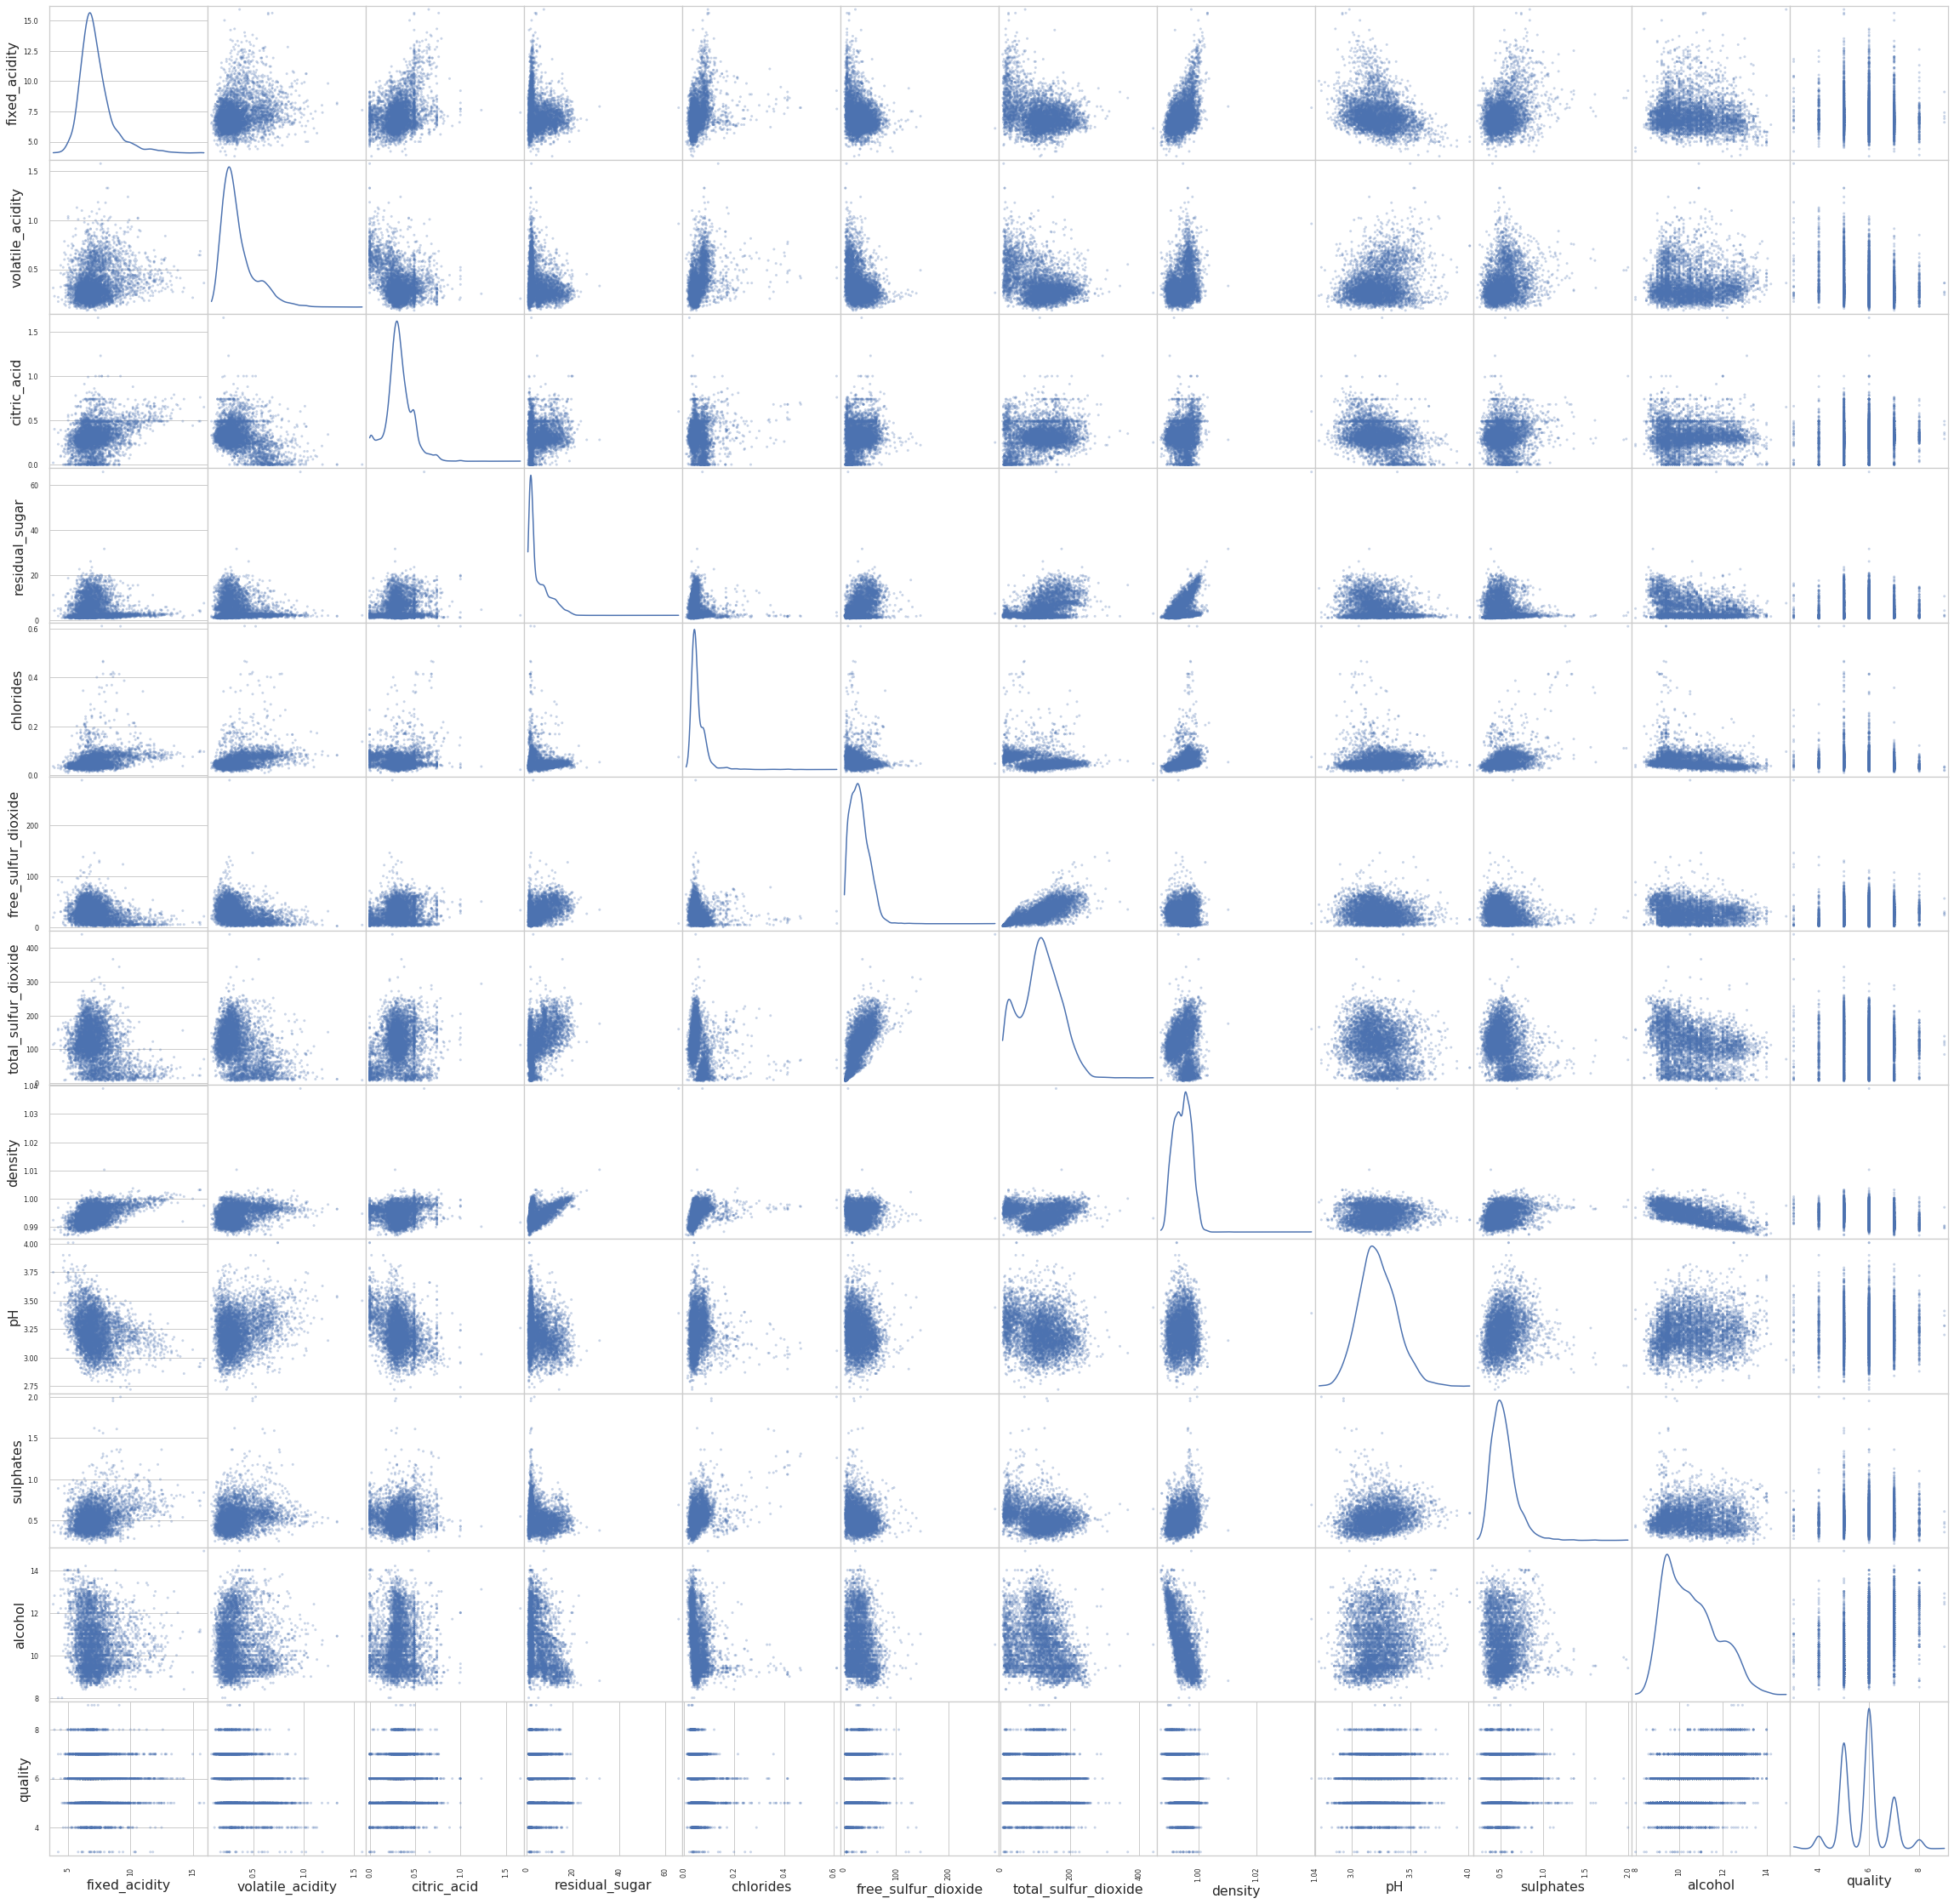

In [26]:
#Scatterplot view
pd.plotting.scatter_matrix(df_wine_final, alpha = 0.3, figsize = (40,40), diagonal = 'kde');


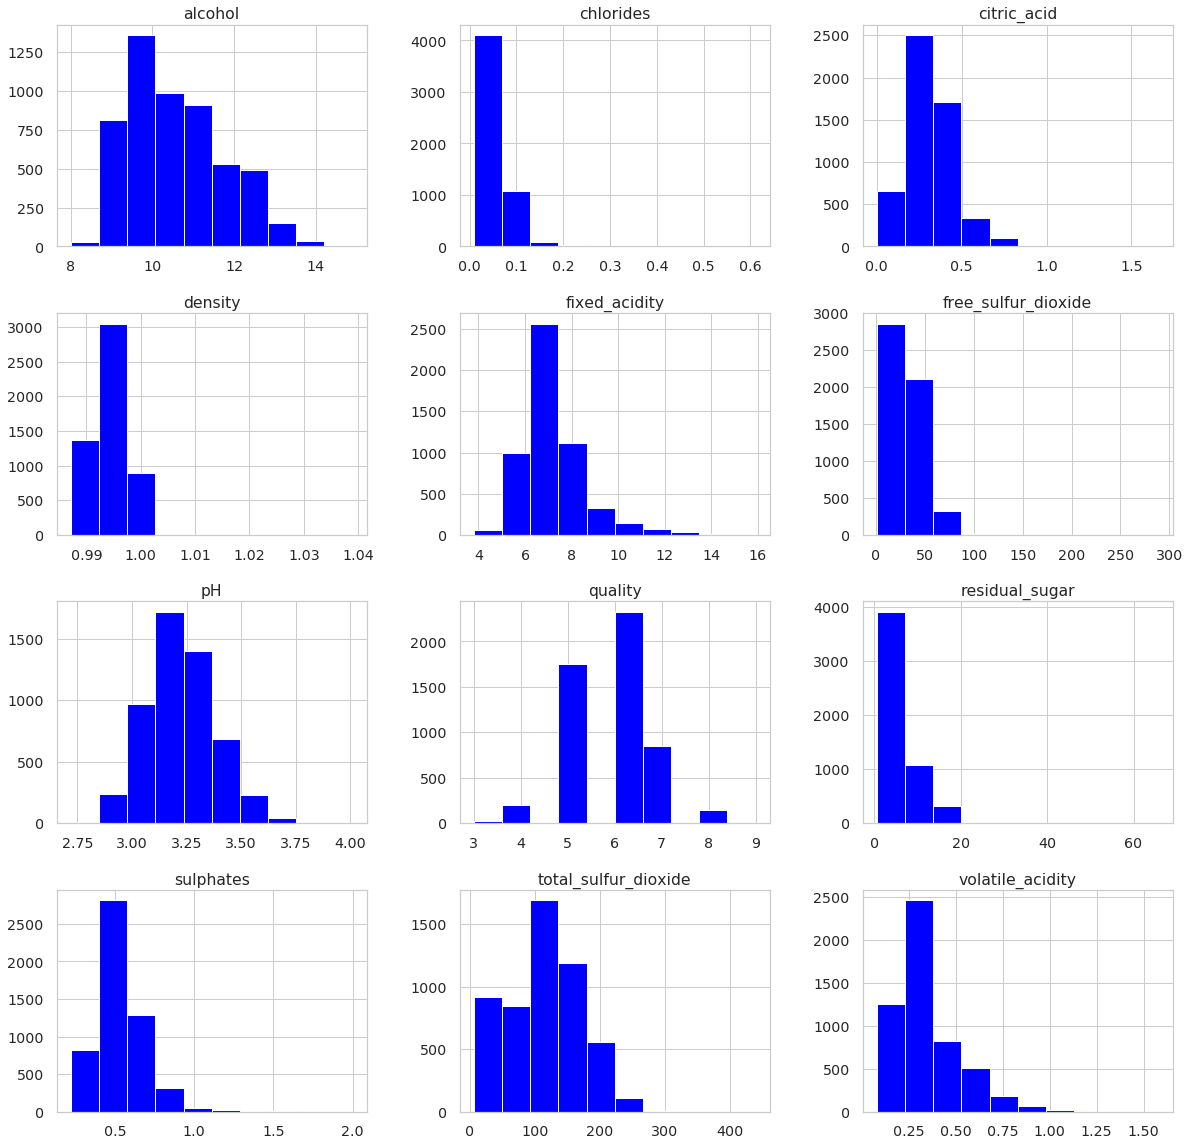

In [25]:
#Histogram view
df_wine_final.hist(figsize=(20,20), color='blue')
plt.show()

# 5. Exploratory Data Analysis


## 5.1 Understanding the quality of wines


In [0]:
#Count of records by the quality of the wine
count_by_quality=df_wine_final.quality.value_counts()
print(count_by_quality)

6    2323
5    1751
7     855
4     206
8     148
3      30
9       5
Name: quality, dtype: int64


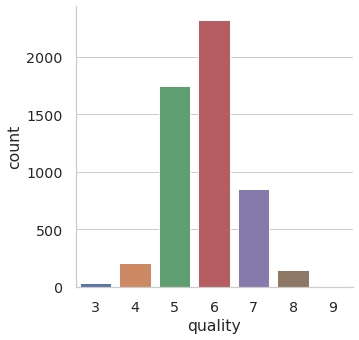

In [0]:
# Plot to show count of records by quality of wine
sns.catplot('quality',data=df_wine_final,kind='count')


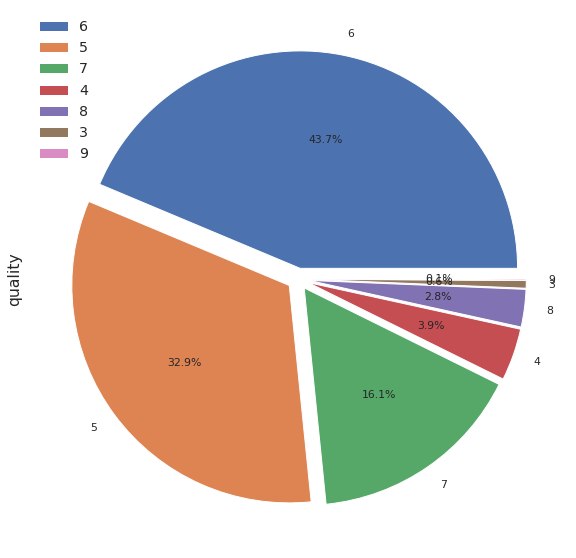

In [60]:
# Pie chart to understand percentage distribution of wines by quality
df_wine_final['quality'].value_counts().plot.pie(figsize=(10,10),autopct='%1.1f%%',explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05],legend=True,textprops={'size': 'x-small'})

The above analysis help us understand the  points
*   There is no wine in the dataset which has a perfect quality score of 10
*   76% of the wines are of average quality - score of 5 or 6 
*   Less than 20% of the wines are of good quality - score of 7 and above



5.2 

### 5.3 How does alcohol contribute to the quality of the wine


```
# This is formatted as code
```



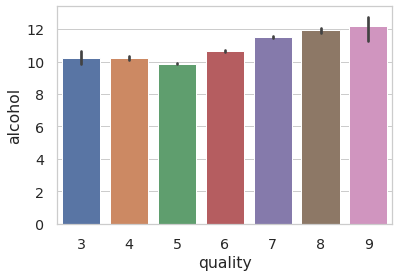

In [66]:
quality_alcohol=df_wine_final[['quality','alcohol']]
sns.barplot(x='quality', y='alcohol', data=quality_alcohol)



From the graph above, we can conclude, that the higher the percentage of alcohol, the greater the quality of wine!!

In [0]:
# Wines with quality greater than 7
qual_7_plus=df_wine.loc[(df_wine['quality'] >=7)]
n_above_6 = qual_7_plus.shape[0]
print("Number of wines with rating greater than or equal to 7 is {}".format(n_above_6))